
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")


Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 


In [ ]:
Customer id - Уникальный идентификатор для каждого клиента

Age - Возраст клиента

Gender - Пол клиента (Мужской/Женский)

Item Purchased - Товар, приобретенный клиентом

Category - Категория приобретенного товара

Purchase Amount (USD) - Сумма покупки в USD

Location - Место, где была совершена покупка

Size - Размер приобретенного товара

Color - Цвет приобретенного товара

In [ ]:
Season - Сезон, в который была совершена покупка

Review Rating - Рейтинг, данный клиентом за приобретенный товар

Subscription Status - Указывает, есть ли у клиента подписка (Да/Нет)

Shipping Type - Тип доставки, выбранный клиентом

Discount Applied - Указывает, была ли применена скидка к покупке (Да/Нет)

Promo Code Used - Указывает, был ли использован промокод для покупки (Да/Нет)

Previous Purchases - Общее количество транзакций, совершенных клиентом в магазине, исключая текущую транзакцию

Payment Method - Наиболее предпочтительный способ оплаты клиента

Frequency of Purchases - Частота совершения покупок клиентом (например, Еженедельно, Раз в две недели, Ежемесячно)

In [174]:
# используем для работы с таблицами 
import pandas as pd
import numpy as np
# используем для визуализации
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [231]:
data = pd.read_csv('shopping_trends_updated.csv')
data[0:10]
#Как выглядит датасет

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [388]:
df = data.copy()
df.info()
#Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

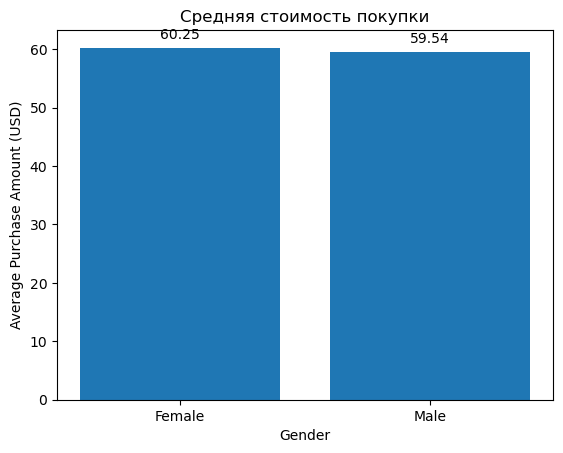

In [328]:
##ГИПОТЕЗА №1 - Женщины в среднем за одну покупку больше чем мужчины
average_purchase = df.groupby('Gender')['Purchase Amount (USD)'].mean()

plt.bar(average_purchase.index, average_purchase.values)
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Средняя стоимость покупки')

for i, v in enumerate(average_purchase.values):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## Гипотеза подтверждается

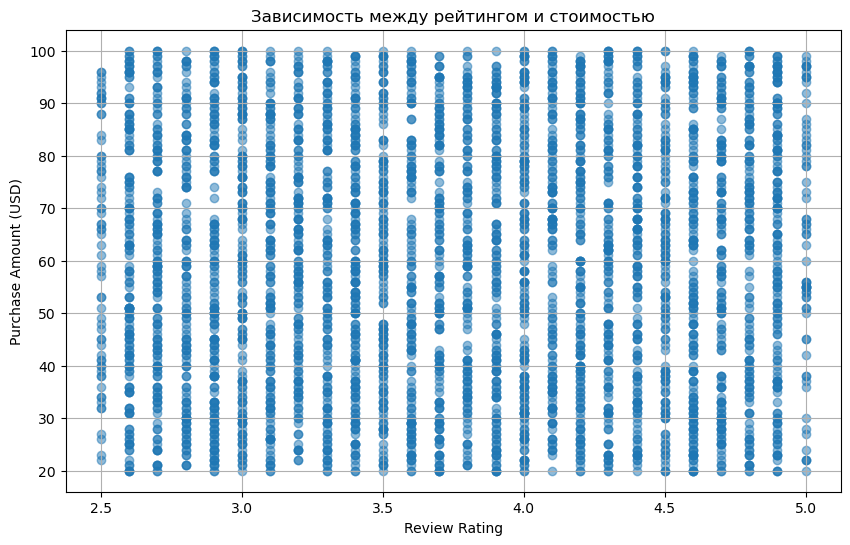

Correlation between Review Rating and Purchase Amount: 0.03


In [350]:
## Гипотеза №2 - положительная корреляция рейтинга товара и его стоимости

df_price_rating = df[['Purchase Amount (USD)', 'Review Rating']]

plt.figure(figsize=(10,6))
plt.scatter(df_price_rating['Review Rating'], df_price_rating['Purchase Amount (USD)'], alpha=0.5) 
plt.title('Зависимость между рейтингом и стоимостью') 
plt.xlabel('Review Rating')  
plt.ylabel('Purchase Amount (USD)') 
plt.grid(True) 
plt.show() 

# Вычисление коэффициента корреляции Пирсона между "Review Rating" и "Purchase Amount (USD)"
correlation = df_price_rating['Review Rating'].corr(df_price_rating['Purchase Amount (USD)'])
print(f'Корреляция между Review Rating и Purchase Amount: {correlation:.2f}')  
# Вывод корреляции 
#гипотеза не подтвердилась


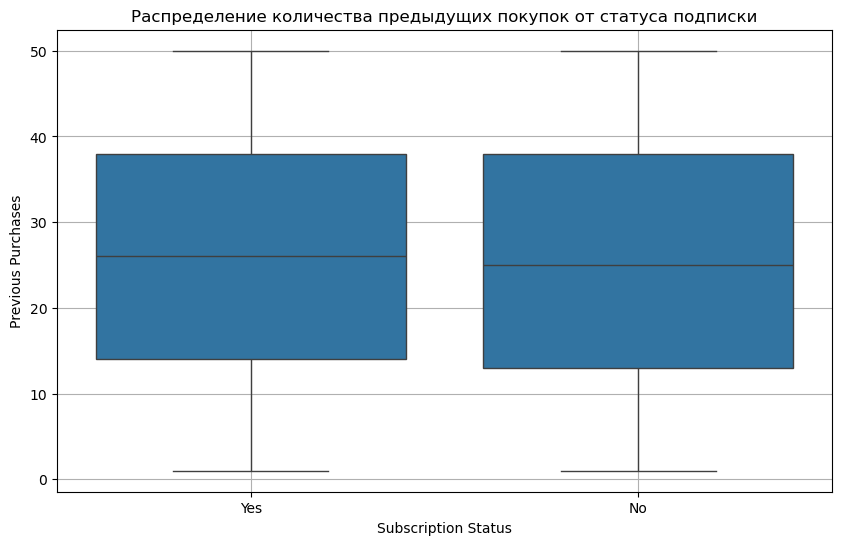

                          mean  median  count
Subscription Status                          
No                   25.080436    25.0   2847
Yes                  26.084520    26.0   1053


In [354]:
##Гипотеза №3 - У покупателей с подпиской больше купленных товаров

df_sub_prev = df[['Subscription Status', 'Previous Purchases']]

plt.figure(figsize=(10,6))  # Установка размера фигуры
sns.boxplot(x='Subscription Status', y='Previous Purchases', data=df_sub_prev)
plt.title('Распределение количества предыдущих покупок от статуса подписки') 
plt.xlabel('Subscription Status')  
plt.ylabel('Previous Purchases') 
plt.grid(True) 
plt.show() 

stats = df_sub_prev.groupby('Subscription Status')['Previous Purchases'].agg(['mean', 'median', 'count'])
print(stats)

## У тех у кого есть подписка, незначительно больше покупок


Promo Code Used    No   Yes
Gender                     
Female           1248     0
Male              975  1677
Promo Code Used        No       Yes
Gender                             
Female           1.000000  0.000000
Male             0.367647  0.632353


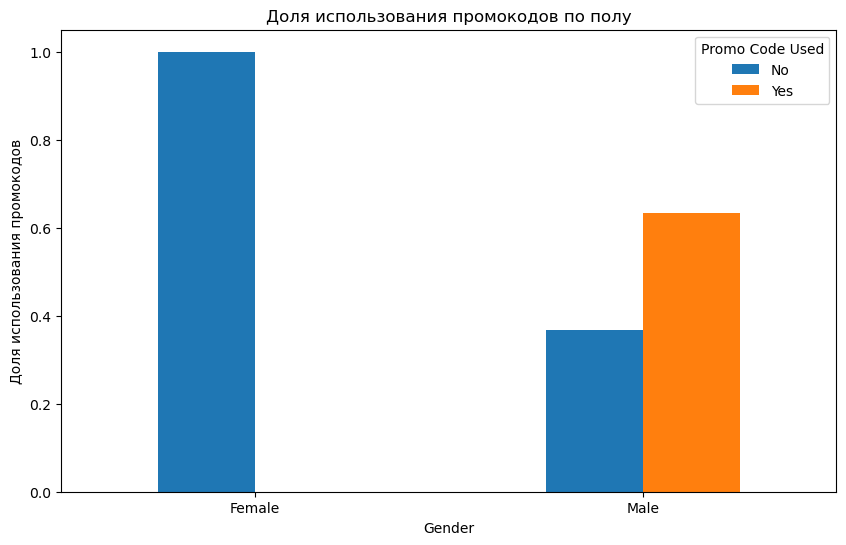

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, Season_order]
Index: []


In [364]:
##Гипотеза №4 - женщины чаще используют промокод

# Выбор столбцов "Gender" и "Promo Code Used"
df_gender_promo = df[['Gender', 'Promo Code Used']]

# Создание таблицы сопряженности для "Gender" и "Promo Code Used"
contingency_table = pd.crosstab(df_gender_promo['Gender'], df_gender_promo['Promo Code Used'])
print(contingency_table)

# Вычисление процентов использования промокодов по полу
contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contingency_table_percent)

# Создание столбчатой диаграммы для визуализации процентов
contingency_table_percent.plot(kind='bar', figsize=(10,6))
plt.title('Доля использования промокодов по полу')
plt.xlabel('Gender')
plt.ylabel('Доля использования промокодов')
plt.xticks(rotation=0)
plt.legend(title='Promo Code Used', loc='upper right')
plt.show()

#Гипотеза не подтвердилась, женщины ни разу не использовали промокод, проверка:
female_with_promo = df[(df['Gender'] == 'Female') & (df['Promo Code Used'] == 'Yes')]
print(female_with_promo)

In [376]:
##Гипотеза №5 - популярные категории у мужчин и женщин отличаются

category_counts = df.groupby(['Gender', 'Category']).size().reset_index(name='Counts')

# Нахождение топ-5 категорий для каждого пола
for gender in df['Gender'].unique():
    gender_data = category_counts[category_counts['Gender'] == gender]
    top_categories = gender_data.sort_values(by='Counts', ascending=False).head(5)
    print(f"Топ 5 категорий для {gender}:")
    print(top_categories)
    print("\n")

##Гипотеза не подтвердилась

Топ 5 категорий для Male:
  Gender     Category  Counts
5   Male     Clothing    1181
4   Male  Accessories     848
6   Male     Footwear     400
7   Male    Outerwear     223


Топ 5 категорий для Female:
   Gender     Category  Counts
1  Female     Clothing     556
0  Female  Accessories     392
2  Female     Footwear     199
3  Female    Outerwear     101




In [111]:
# 1. Самый популярный товар
item_counts = df['Item Purchased'].value_counts()
most_popular_item = item_counts.idxmax()
most_popular_item_counts = item_counts.max()
print(f"Самый популярный товар: {most_popular_item}", f", в количестве: {most_popular_item_counts}")

Самый популярный товар: Blouse , в количестве: 171


In [233]:
# 2. Распределение покупателей по полу
gender_counts = df['Gender'].value_counts()
print("Распределение покупателей по gender:")
print(gender_counts)

Распределение покупателей по gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


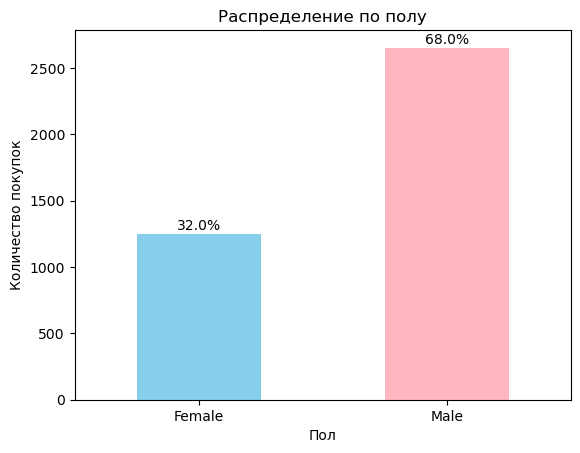

In [235]:
purchase_counts = df.groupby('Gender').size()

total_purchases = purchase_counts.sum()
percentages = (purchase_counts / total_purchases) * 100

# Plot
ax = purchase_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупок')
plt.xticks(rotation=0)

for i, count in enumerate(purchase_counts):
    percentage = percentages[i]
    ax.text(i, count + 10, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

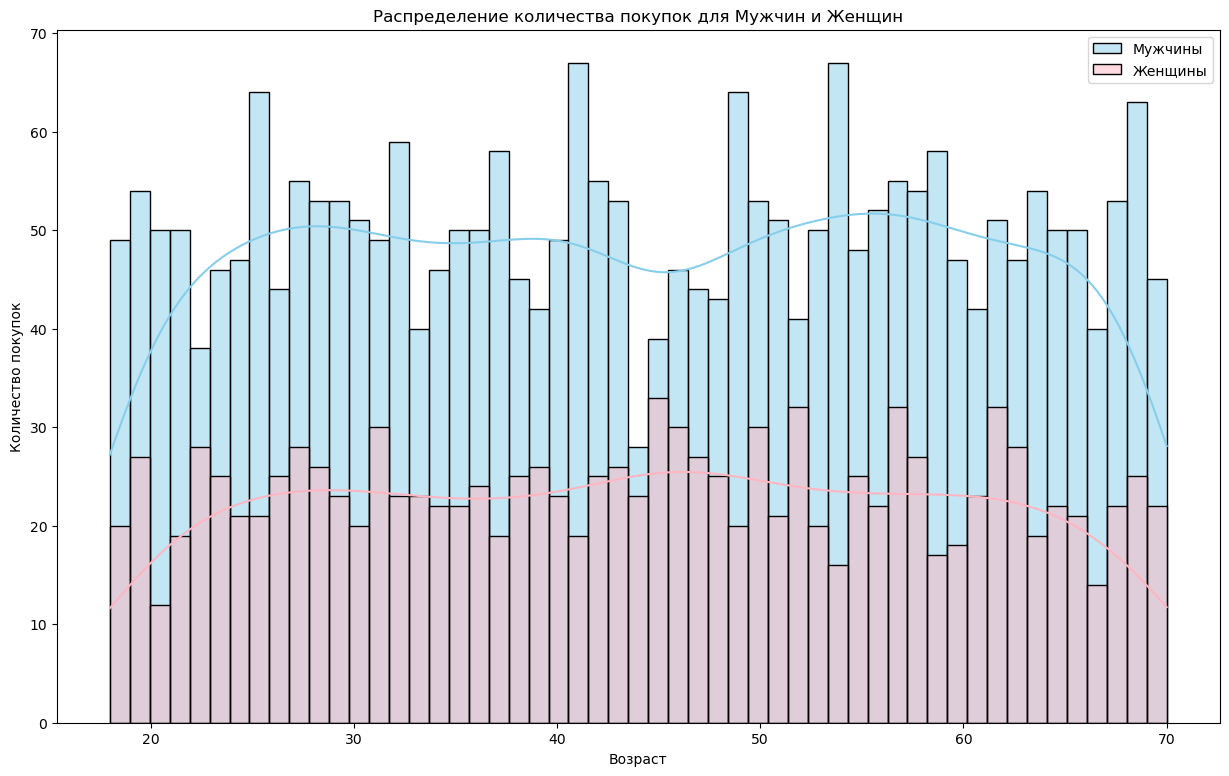

In [192]:
# 3. определить, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

men_df = df[df['Gender'] == 'Male']
women_df = df[df['Gender'] == 'Female']

plt.figure(figsize=(15, 9))

sns.histplot(men_df['Age'], bins=53, kde=True, color='skyblue', label='Мужчины')

sns.histplot(women_df['Age'], bins=53, kde=True, color='lightpink', label='Женщины')

plt.title('Распределение количества покупок для Мужчин и Женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.legend()
plt.show()

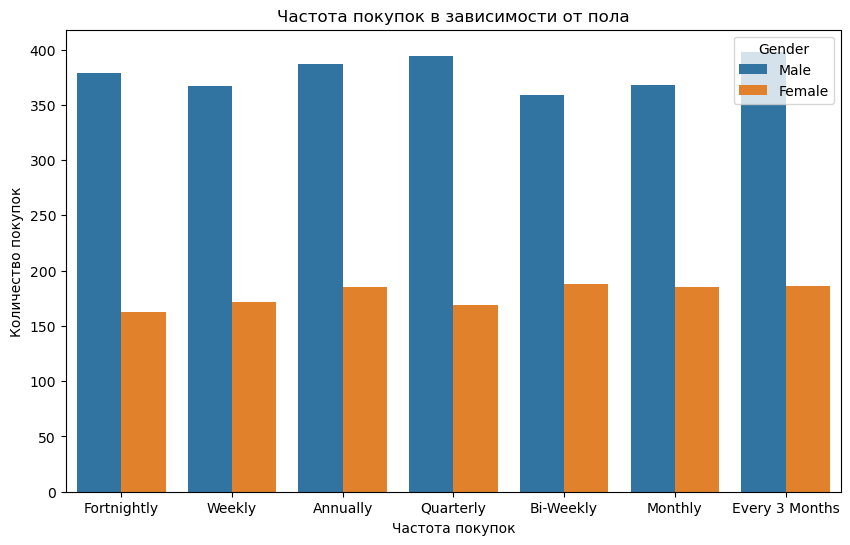

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Season_order'],
      dtype='object')
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [251]:
purchase_frequency = df.groupby(['Gender', 'Frequency of Purchases']).size().unstack()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Gender')
plt.title('Частота покупок в зависимости от пола')
plt.xlabel('Частота покупок')
plt.ylabel('Количество покупок')
plt.legend(title='Gender')
plt.show()

print(df.columns) 

unique_values = df['Frequency of Purchases'].unique()

print(unique_values)

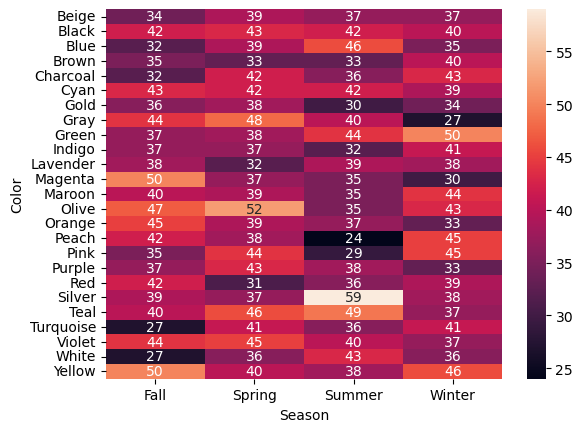

In [180]:
#Тепловая карта зависимости цвета от времени года и количества покупок

contingency_table = pd.crosstab(df['Color'], df['Season'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(contingency_table, annot=True)
plt.xlabel('Season')
plt.ylabel('Color')
plt.show()

Seasonal MAU:
   Season  MAU
0  Winter  971
1  Spring  999
2  Summer  955
3    Fall  975


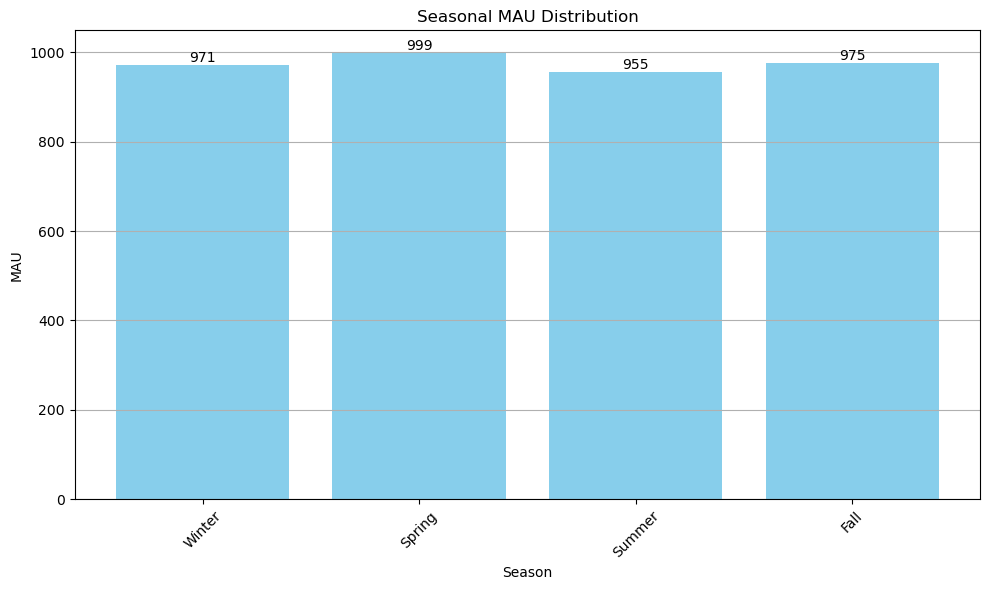

In [247]:

season_order = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4, }
df['Season_order'] = df['Season'].map(season_order)
df['Season_order'].fillna(0, inplace=True)

#расчеты
seasonal_mau = df.groupby(['Season_order', 'Season'])['Customer ID'].nunique().reset_index()
seasonal_mau.rename(columns={'Customer ID': 'MAU'}, inplace=True)

seasonal_mau.sort_values(by='Season_order', inplace=True)
print("Seasonal MAU:")
print(seasonal_mau[['Season', 'MAU']])

# СТРОИМ ГРАФИК

plt.figure(figsize=(10, 6))
plt.bar(seasonal_mau['Season'], seasonal_mau['MAU'], color='skyblue')

# Add data labels
for index, row in seasonal_mau.iterrows():
    plt.text(row['Season'], row['MAU'], str(row['MAU']), ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('MAU')
plt.title('Seasonal MAU Distribution')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('seasonal_mau_bar_plot.png')
plt.show()

In [398]:
# сбор всех названий одежды в одну строку 
all_items = ''.join(df['Item Purchased'].dropna().astype(str).values)
all_items = all_items.lower() 

# самая популярная буква
letter_counts = Counter(all_items)
most_common_letter, count = letter_counts.most_common(1)[0]

print(f'Самая популярная буква: "{most_common_letter}"')
print(f'Встречается {count} раз(а)')

NameError: name 'Counter' is not defined

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [300]:
#Загружаем и проверяем датасет
data2 = pd.read_csv('drinks.csv')
df2 = data2.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
99           Luxembourg                          11.4
155            Slovakia                          11.4


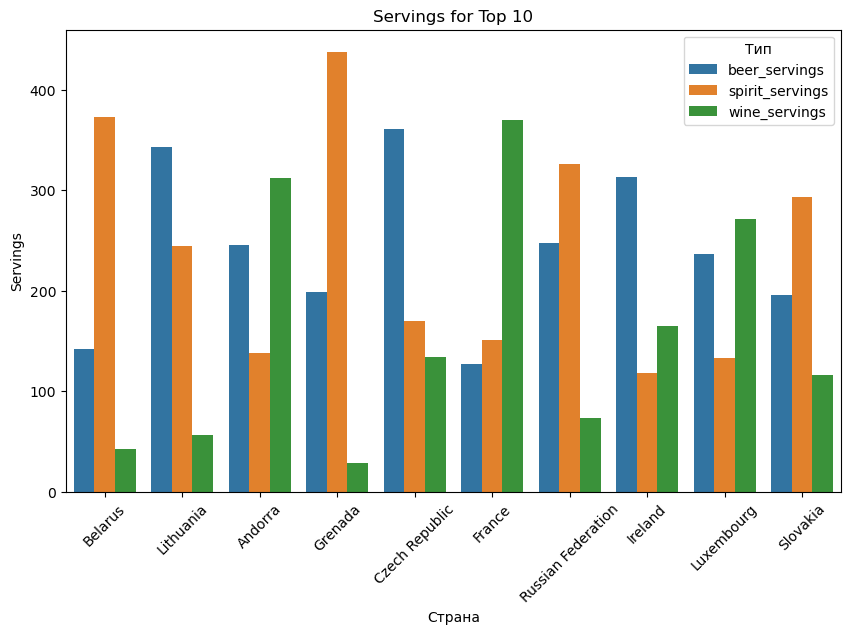

In [276]:
# поиск топ 10 пьющих стран по параметру total_litres_of_pure_alcohol
top_countries = df2.nlargest(10, 'total_litres_of_pure_alcohol')
print(top_countries[['country', 'total_litres_of_pure_alcohol']])
#новая выборка
top_countries_data = top_countries[['country', 'beer_servings', 'spirit_servings', 'wine_servings']]

melted_data = top_countries_data.melt(id_vars='country', var_name='drink_type', value_name='servings')

# строим
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='servings', hue='drink_type', data=melted_data)
plt.title('Servings for Top 10')
plt.xlabel('Страна')
plt.ylabel('Servings')
plt.legend(title='Тип')
plt.xticks(rotation=45)
plt.show()

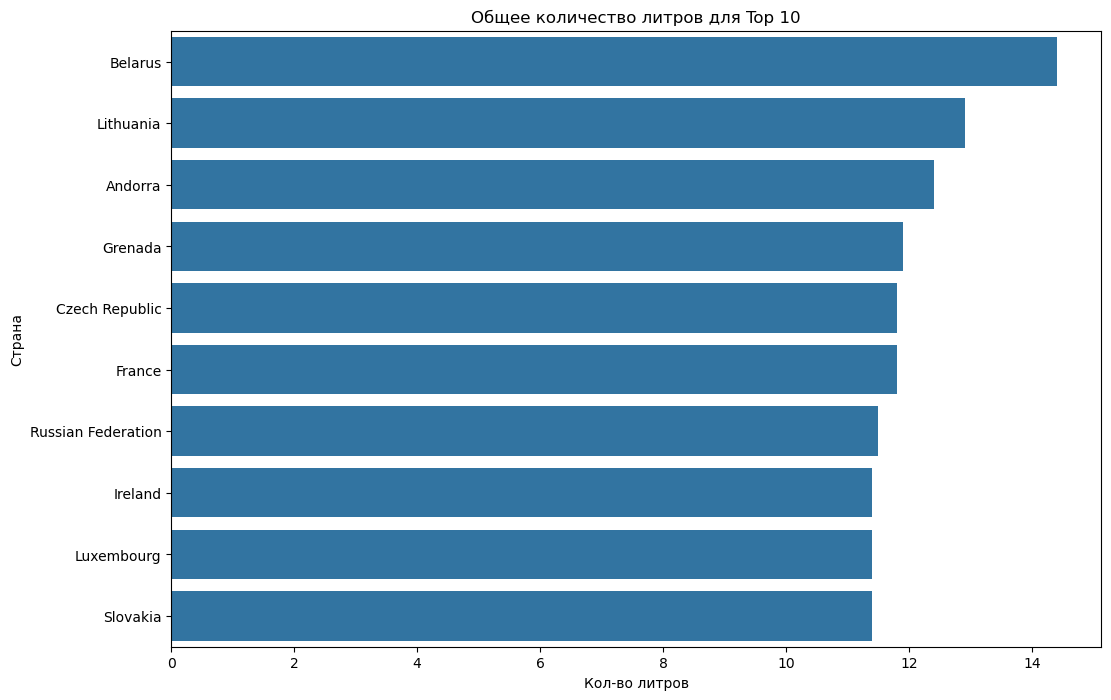

In [288]:
# top 10 countries by total_litres_of_pure_alcohol
top10 = df2.nlargest(10, 'total_litres_of_pure_alcohol')

plt.figure(figsize=(12, 8))
sns.barplot(x='total_litres_of_pure_alcohol', y='country', data=top10)
plt.title('Общее количество литров для Top 10 самых пьющих')
plt.xlabel('Кол-во литров')
plt.ylabel('Страна')
plt.show()

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [18]:
data3 = pd.read_csv('tarantino.csv');
df3 = data3.copy();
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [88]:
data3[1390:1400]

,movie,type,word,minutes_in
1390,Django Unchained,word,n-word,113.50
1391,Django Unchained,word,n-word,113.97
1392,Django Unchained,word,n-word,114.05
1393,Django Unchained,word,fuck,114.15
1394,Django Unchained,word,bitch,114.18
1395,Django Unchained,word,goddamn,114.93
1396,Django Unchained,word,bitches,115.02
1397,Django Unchained,word,bitches,115.07
1398,Django Unchained,word,damn,116.65
1399,Django Unchained,word,goddamn,117.85


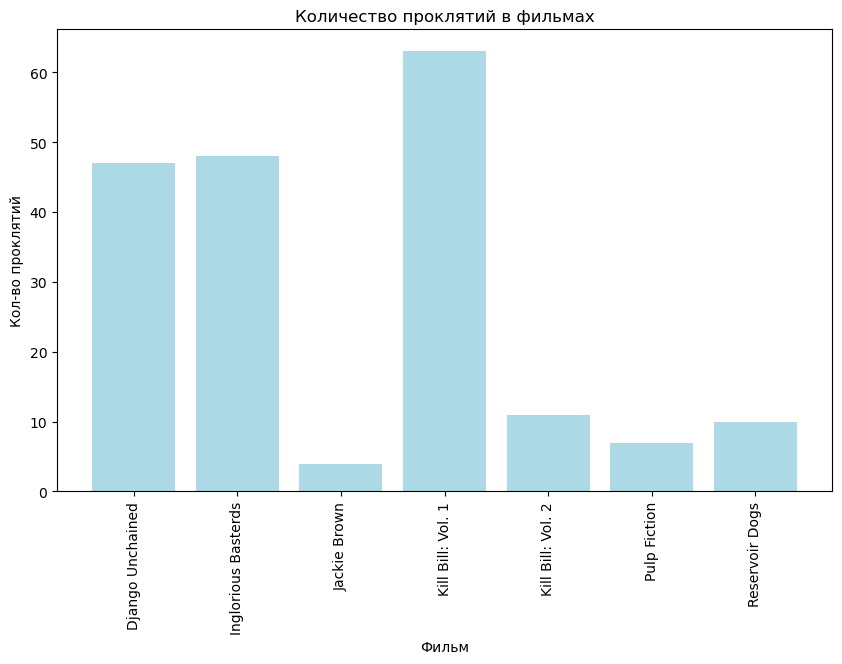

In [216]:

curses = df3[df3['type'] == 'death']

curses_per_movie = curses.groupby('movie')['type'].count().reset_index(name='curses_count')

total_words_per_movie = df[df['type'] == 'word'].groupby('movie')['type'].count().reset_index(name='total_words')

movie_data = pd.merge(curses_per_movie, total_words_per_movie, on='movie', how = 'left')


movie_data['curses_proportion'] = movie_data['curses_count'] / movie_data['total_words']

plt.figure(figsize=(10,6))
plt.bar(movie_data['movie'], movie_data['curses_count'], color='Lightblue')
plt.xlabel('Фильм')
plt.ylabel('Кол-во проклятий')
plt.title('Количество проклятий в фильмах')
plt.xticks(rotation=90)
plt.show()

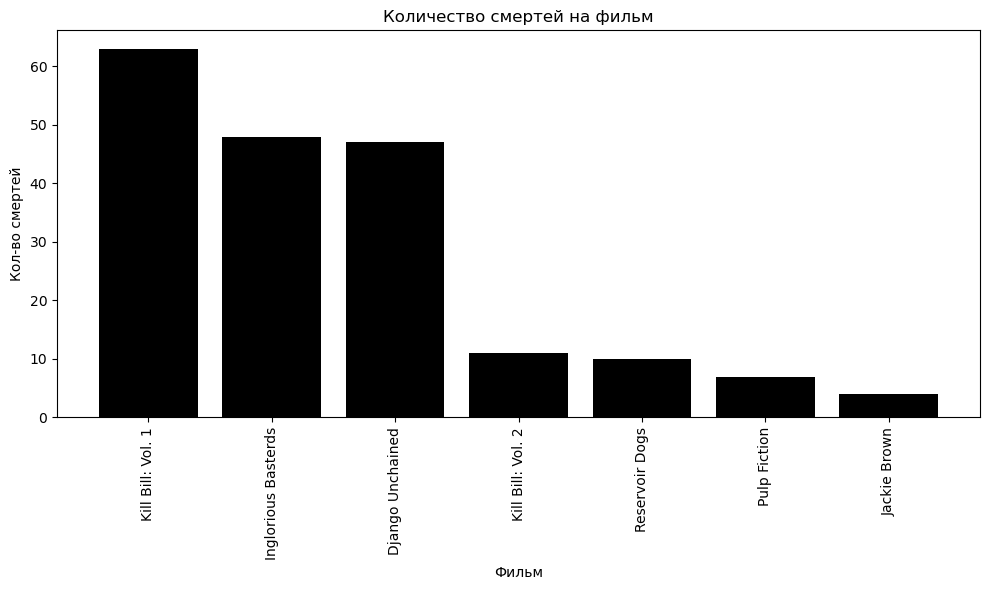

In [224]:
all_movies = df['movie'].unique()

deaths = df3[df3['type'] == 'death']

deaths_per_movie = deaths['movie'].value_counts()

movie_deaths = pd.DataFrame({'movie': all_movies})
movie_deaths['death_count'] = movie_deaths['movie'].map(deaths_per_movie).fillna(0)

movie_deaths = movie_deaths.sort_values(by='death_count', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(movie_deaths['movie'], movie_deaths['death_count'], color='black')
plt.xlabel('Фильм')
plt.ylabel('Кол-во смертей')
plt.title('Количество смертей на фильм')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

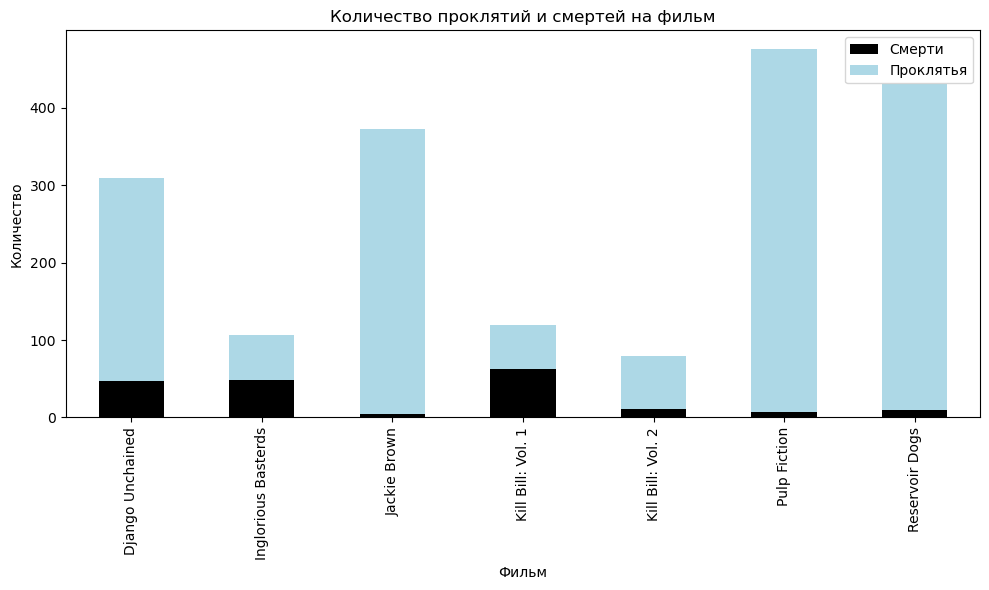

In [312]:
death_counts = df3[df3['type'] == 'death'].groupby('movie')['type'].count().reset_index(name='death_count')
curse_counts = df3[df3['type'] == 'word'].groupby('movie')['type'].count().reset_index(name='curse_count')
combined = pd.merge(death_counts, curse_counts, on='movie', how='outer').fillna(0)
combined.set_index('movie', inplace=True)

ax = combined.plot(kind='bar', stacked=True, figsize=(10,6), color=['black', 'lightblue'])
ax.set_xticklabels(combined.index, rotation=0)
plt.title('Количество проклятий и смертей на фильм')
plt.xlabel('Фильм')
plt.ylabel('Количество')
plt.legend(['Смерти', 'Проклятья'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [146]:
curses_count = len(df[df['type'] == 'word'])
deaths_count = len(df[df['type'] == 'death'])

print(f"Количество проклятий: {curses_count}")
print(f"Количество смертей: {deaths_count}")

Количество проклятий: 1704
Количество смертей: 190


In [ ]:
##частота употребления конкретных проклятий

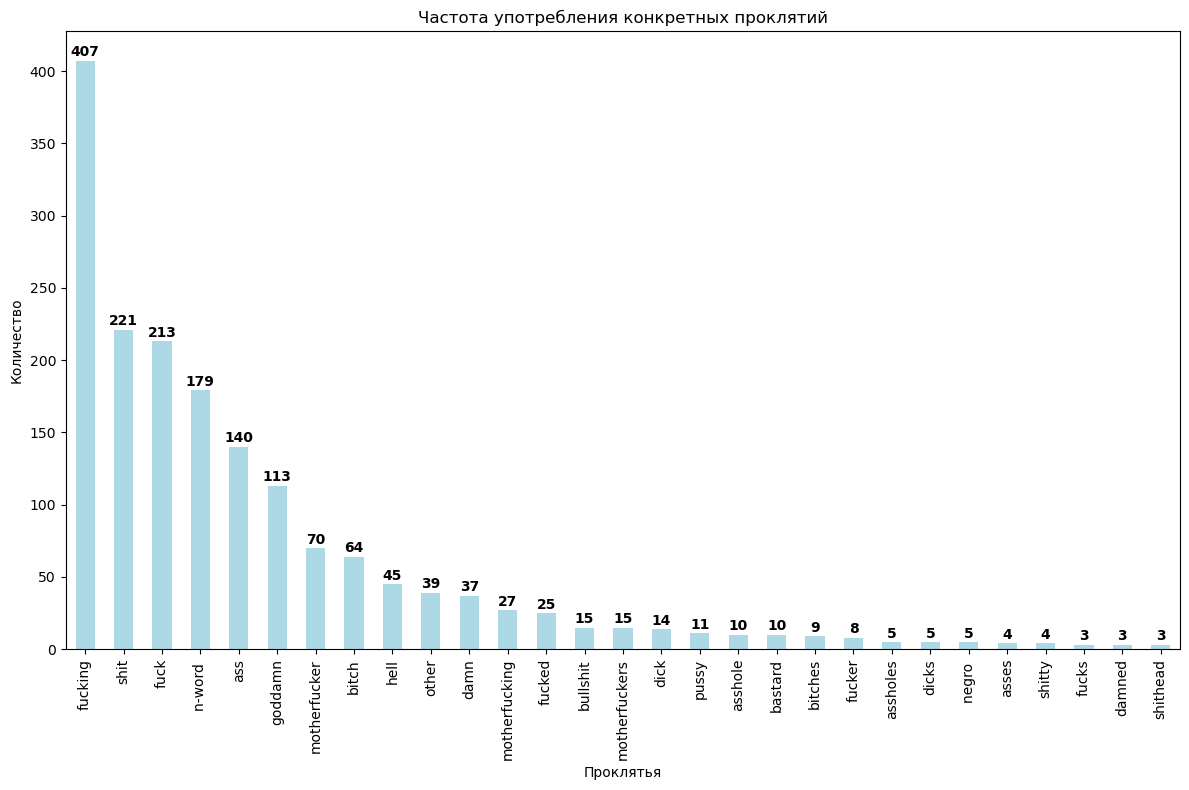

In [194]:

curses_df = df3[df3['type'] == 'word']

# считаем повторения
word_counts = curses_df['word'].value_counts().sort_values(ascending=False)

# не учитываем малоповторяющиеся
rare_words = word_counts[word_counts < 3].index
curses_df['word_category'] = curses_df['word'].apply(lambda x: 'other' if x in rare_words else x)
category_counts = curses_df['word_category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='lightblue')
plt.title('Частота употребления конкретных проклятий')
plt.xlabel('Проклятья')
plt.ylabel('Количество')

for i, v in enumerate(category_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#МЕНЬШЕ ТРЕХ ОТДЕЛЬНАЯ КОЛОНКА - other

In [116]:
# список фильмов
unique_movies = df3['movie'].unique()
print(unique_movies)

['Reservoir Dogs' 'Pulp Fiction' 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2'
 'Inglorious Basterds' 'Django Unchained' 'Jackie Brown']


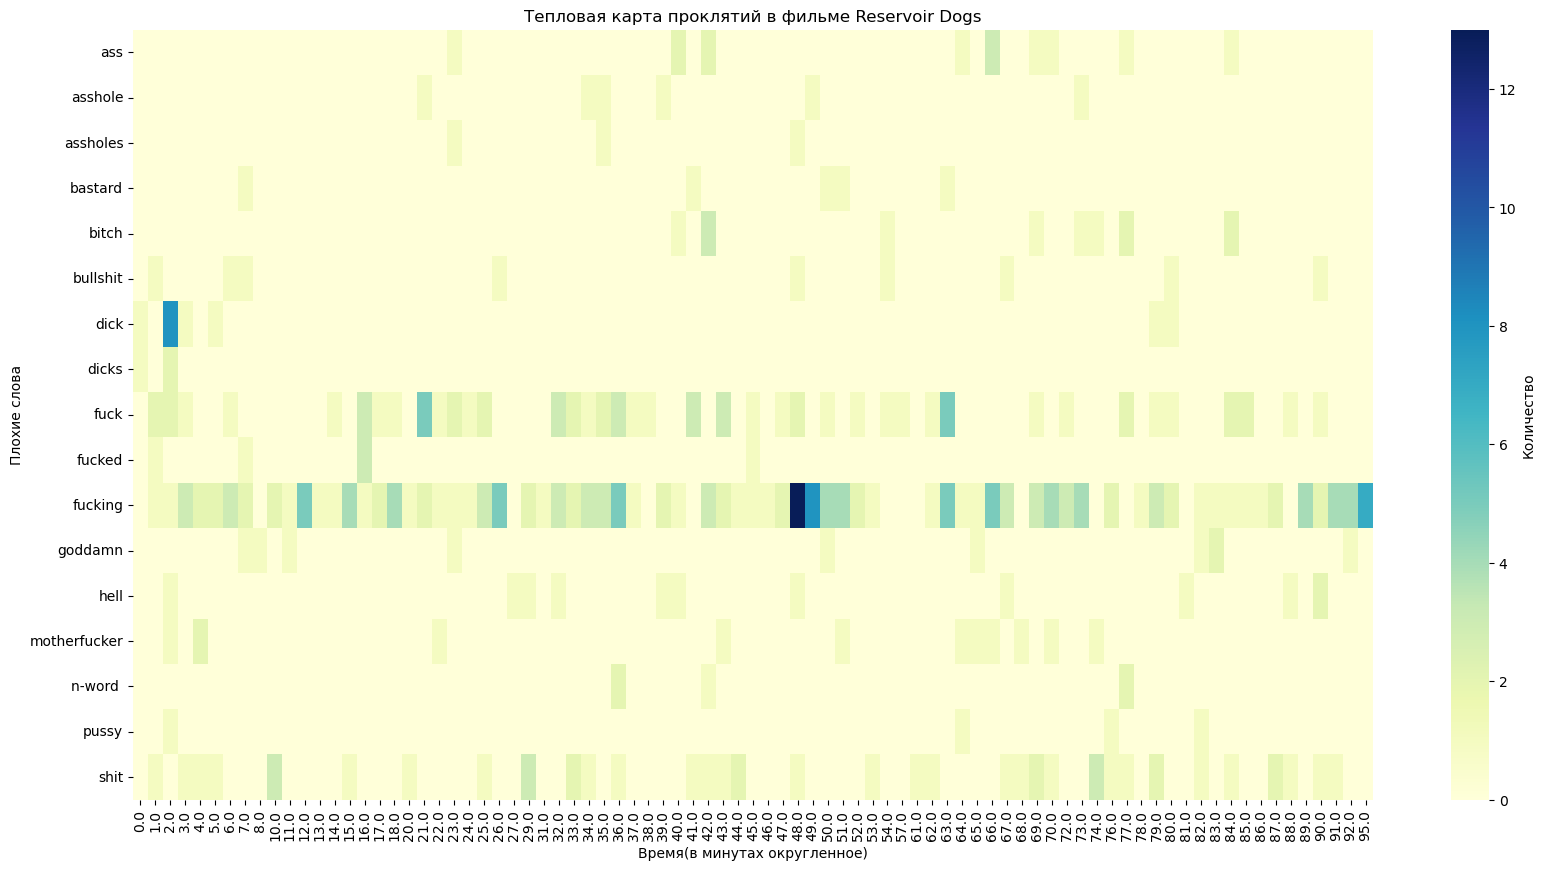

word
fucking          180
fuck              68
shit              45
dick              13
ass               13
hell              12
bitch             12
motherfucker      12
goddamn           10
bullshit           9
asshole            6
fucked             6
n-word             5
bastard            5
pussy              4
dicks              3
assholes           3
fucks              2
jap                1
damn               1
faggot             1
wetback            1
bitches            1
damned             1
fuckup             1
asshead            1
shitty             1
fucker             1
asses              1
motherfuckers      1
cocksucker         1
Name: count, dtype: int64


In [124]:
#Выведем распределение времени только для ТОП-3 фильмов по ругательствам

#распределение времени между проклятиями ДЛЯ ФИЛЬМА Reservoir Dogs
#выбираем проклятья для фильма "Reservoir Dogs"
reservoir_dogs = df3[(df3['movie'] == "Reservoir Dogs") & (df3['type'] == 'word')]

reservoir_dogs['minutes_rounded'] = reservoir_dogs['minutes_in'].round()

word_counts1 = reservoir_dogs['word'].value_counts()

# Для восприятия, если слово звучало в фильме меньше трех раз, его не учитываем
common_words = word_counts[word_counts >= 3].index
reservoir_dogs = reservoir_dogs[reservoir_dogs['word'].isin(common_words)]

pivot_table = reservoir_dogs.pivot_table(index='word', columns='minutes_rounded', values='type', aggfunc='count', fill_value=0)

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Количество'})
plt.title('Тепловая карта проклятий в фильме Reservoir Dogs')
plt.xlabel('Время(в минутах округленное)')
plt.ylabel('Плохие слова')
plt.xticks(rotation=90)
plt.show()

print(word_counts1)

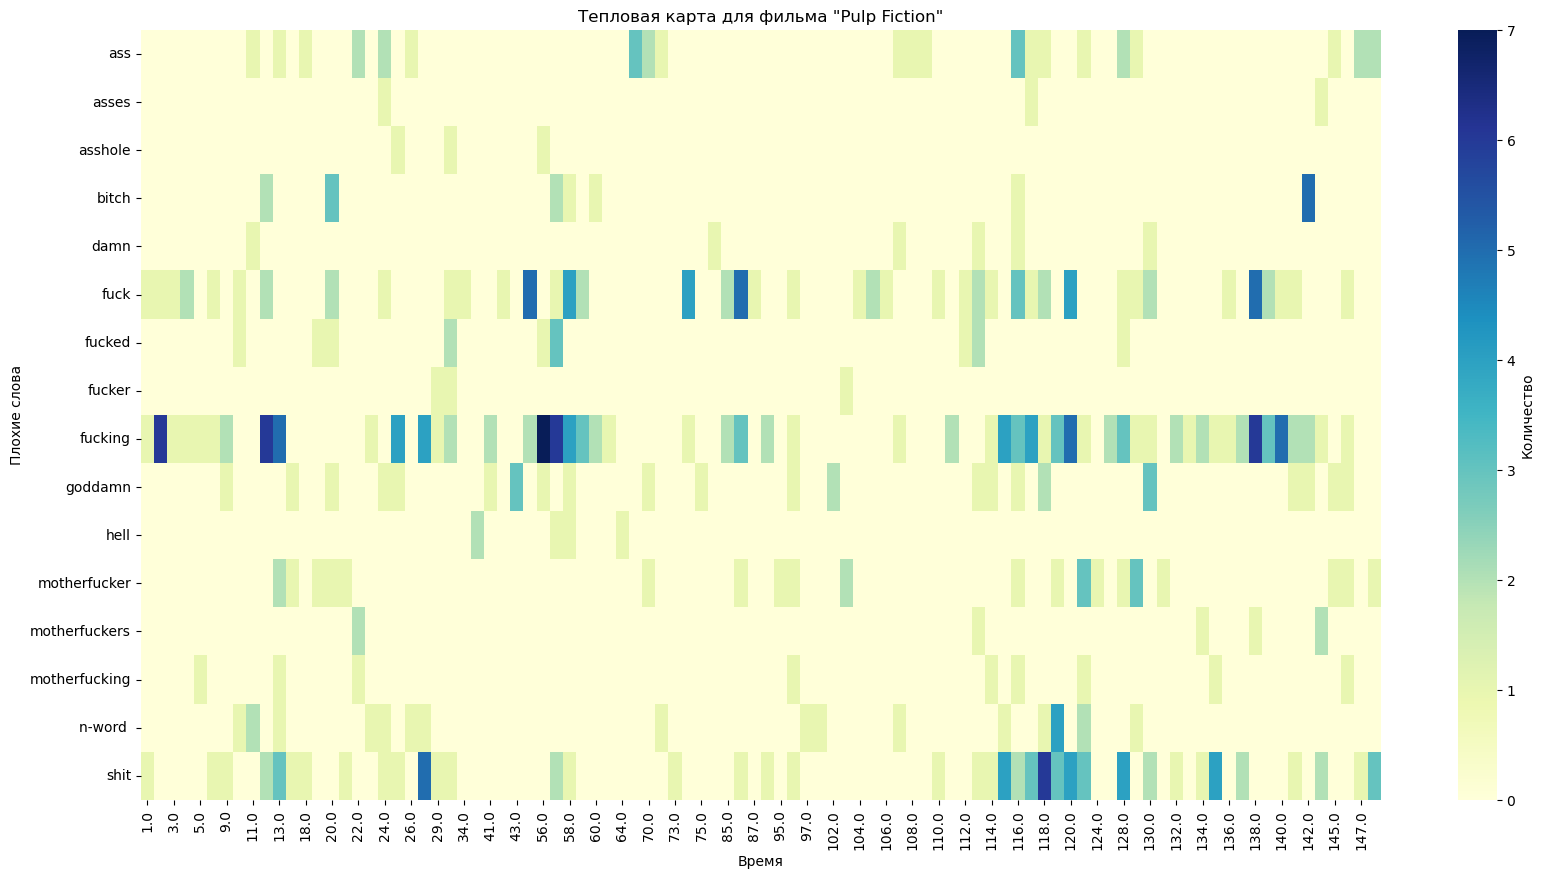

word
fucking          133
shit              76
fuck              74
ass               31
goddamn           28
motherfucker      26
n-word            21
bitch             15
fucked            13
motherfucking      9
motherfuckers      7
damn               6
hell               5
asses              3
fucker             3
asshole            3
gooks              2
damned             2
fuckhead           1
bullshit           1
slope              1
merde              1
assholes           1
wetback            1
chickenshit        1
dickless           1
gook               1
pussy              1
fuckers            1
dicks              1
Name: count, dtype: int64


In [138]:
#Тепловая карта для фильма Pulp Fiction


pulp_fiction = df3[(df3['movie'] == "Pulp Fiction") & (df3['type'] == 'word')]

pulp_fiction['minutes_rounded'] = pulp_fiction['minutes_in'].round()

word_counts = pulp_fiction['word'].value_counts()

common_words = word_counts[word_counts >= 3].index
pulp_fiction = pulp_fiction[pulp_fiction['word'].isin(common_words)]

pivot_table = pulp_fiction.pivot_table(index='word', columns='minutes_rounded', values='type', aggfunc='count', fill_value=0)

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Количество'})
plt.title('Тепловая карта для фильма "Pulp Fiction"')
plt.xlabel('Время')
plt.ylabel('Плохие слова')
plt.xticks(rotation=90)
plt.show()

print(word_counts)

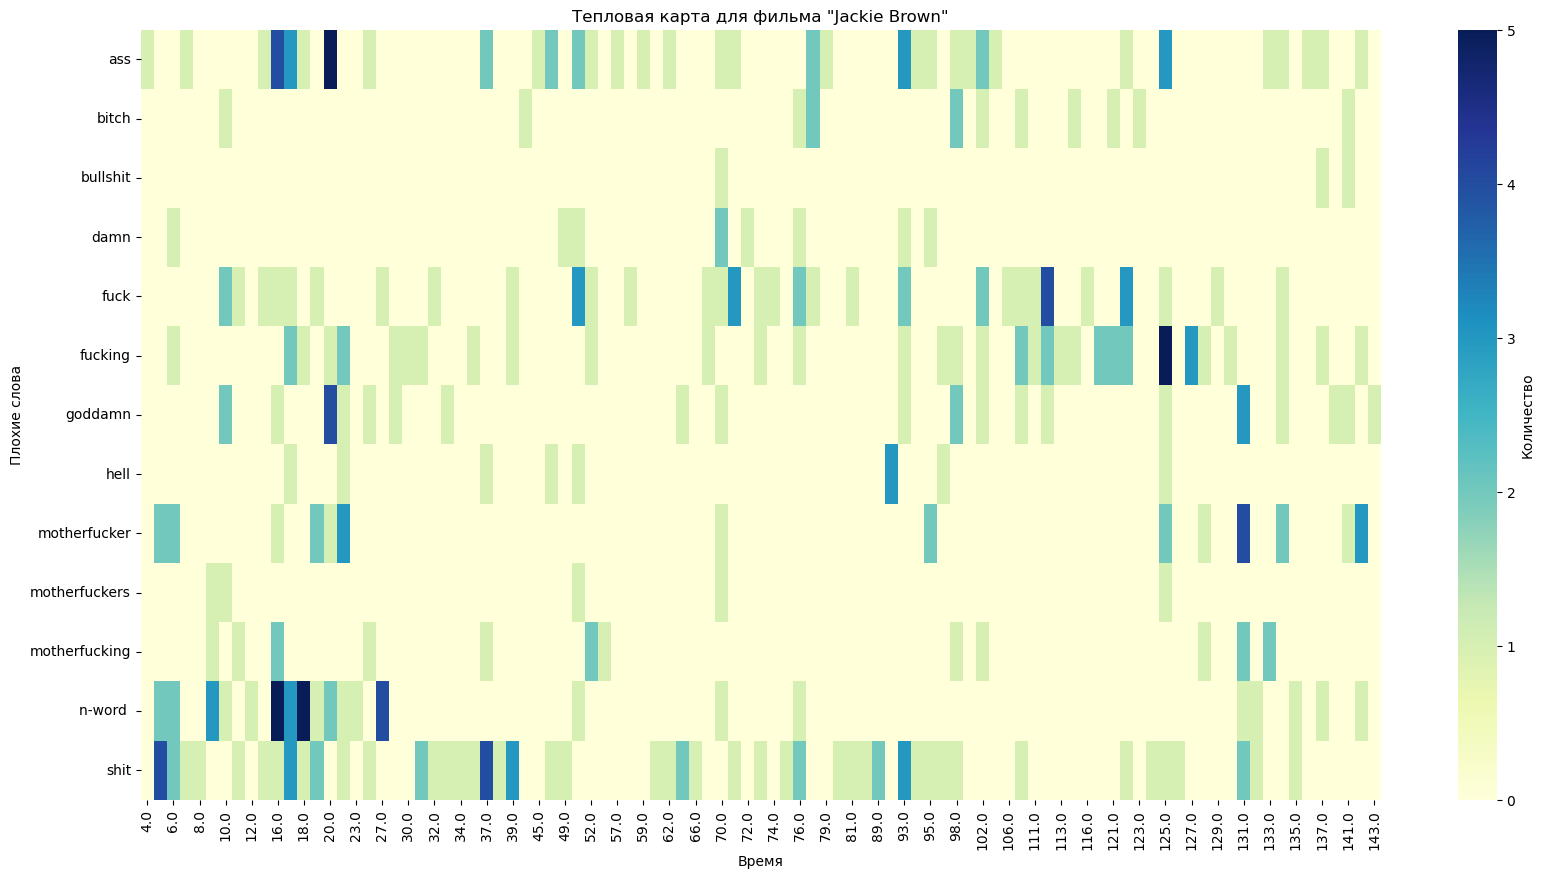

word
shit             66
ass              52
fucking          46
fuck             44
n-word           39
motherfucker     27
goddamn          27
motherfucking    16
bitch            13
hell             10
damn              9
motherfuckers     5
bullshit          3
shitty            2
shitload          2
fucks             1
shittiest         1
dick              1
pussy             1
fucked            1
bitches           1
dumbass           1
Name: count, dtype: int64


In [140]:
#Тепловая карта для фильма Pulp Fiction

jackie_brown = df3[(df3['movie'] == "Jackie Brown") & (df3['type'] == 'word')]

jackie_brown['minutes_rounded'] = jackie_brown['minutes_in'].round()

word_counts = jackie_brown['word'].value_counts()

common_words = word_counts[word_counts >= 3].index
jackie_brown = jackie_brown[jackie_brown['word'].isin(common_words)]


pivot_table = jackie_brown.pivot_table(index='word', columns='minutes_rounded', values='type', aggfunc='count', fill_value=0)

plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Количество'})
plt.title('Тепловая карта для фильма "Jackie Brown"')
plt.xlabel('Время')
plt.ylabel('Плохие слова')
plt.xticks(rotation=90)
plt.show()

print(word_counts)